I'll try to build a network described in this example using numpy:
https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf
And maybe try solving MNIST with it. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def weights_init(m, n):
    layer = np.random.uniform(-1, 1, size=(m,n))
    return layer / np.sqrt(m*n)

In [4]:
def bias_init(m):
    return np.random.uniform(-1, 1, m)

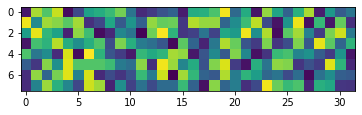

In [5]:
plt.imshow(weights_init(8, 32))

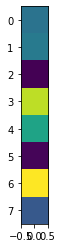

In [6]:
plt.imshow(np.expand_dims(bias_init(8), axis=1))

In [7]:
def softmax(z):
    exps = np.exp(z - np.max(z))
    return exps / np.sum(exps)

In [8]:
def relu(z):
    return np.maximum(z, 0)

In [9]:
def d_relu(z):
    return z > 0 

In [10]:
def cross_entropy(right, wrong):
    return -(right * np.log(wrong)).sum()


In [170]:
# I followed notation from here from the pdf on top.
# https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf
# It doesn't make a particulary good naming though. 
# Probably it'll get renamed later. 

y = np.zeros(10)

x  = np.random.uniform(-1, 1, 784)
print(x.shape)

W  = weights_init(128, 784)
b1 = bias_init(128)
z  = W @ x + b1
h = relu(z)

U  = weights_init(10, 128)
b2 = bias_init(10)
t = U @ h + b2

y_hat = softmax(t)
J = cross_entropy(y, y_hat)


#computing gradients
dJ_dU   = np.outer((y_hat - y), h)
dJ_db2  = (y_hat - y)
dJ_dW   = np.outer((y_hat - y) @ U * np.sign(h), x)
dJ_db1  = (y_hat - y) @ U * np.sign(h)



(784,)


In [167]:
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [83]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
x*y

array([1, 4, 9])

In [ ]:
# gradient_of_cross_entropy_wrt_z = output - true output
# https://stats.stackexchange.com/questions/235528/backpropagation-with-softmax-cross-entropy

In [17]:
y = [1,0]
out = np.zeros((len(y),10), np.float32)
out[range(out.shape[0]),y] = 1
out

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [229]:
def forward_backward(x, y):
    print(x.shape)
    x = x.T
    print(x.shape)
  

    out = np.zeros((len(y),10), np.float32)
    out[range(out.shape[0]),y] = 1
    
    
    z  = W @ x + b1
    print((z.shape))
    h = relu(z)
    t = U @ h + b2
    y_hat = softmax(t)
    J = cross_entropy(out.T, y_hat)
    
    
    #computing gradients
    dJ_dU   = ((y_hat.T - out).T @ h.T)
    dJ_db2  = (y_hat.T - out)
    dJ_dW   = ((y_hat.T - out) @ U * np.sign(h) @ x.T)
    dJ_db1  = (y_hat.T - out) @ U * np.sign(h)
    
    return dJ_dU, dJ_db2, dJ_dW, dJ_db1

(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)


<ipython-input-10-98f0afc7dc09>:2: RuntimeWarning: divide by zero encountered in log
  return -(right * np.log(wrong)).sum()
<ipython-input-10-98f0afc7dc09>:2: RuntimeWarning: invalid value encountered in multiply
  return -(right * np.log(wrong)).sum()


(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(

<ipython-input-229-4decfcf14760>:14: RuntimeWarning: overflow encountered in matmul
  t = U @ h + b2
<ipython-input-7-1fcd83f6c9dd>:2: RuntimeWarning: invalid value encountered in subtract
  exps = np.exp(z - np.max(z))


(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)


(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(

(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)


(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(

(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)
(784, 128)
(128, 128)
(10, 128)
(128, 784)


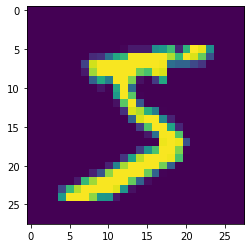

In [233]:
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]
plt.imshow(X_train[0])

W  = weights_init(128, 784)
b1 = bias_init(128)
U  = weights_init(10, 128)
b2 = bias_init(128)

lr = 0.001
BS = 128
for i in range(1000):

    samp = np.random.randint(0, X_train.shape[0], size=(BS))
    X = X_train[samp].reshape((-1, 28*28))
    Y = Y_train[samp]
    dJ_dU, dJ_db2, dJ_dW, dJ_db1 = forward_backward(X, Y)
    # SGD
    print(dJ_dU.shape)
    U  = U  - lr*dJ_dU
    b2 = b2 - (lr*dJ_db2).T
    W  = W - lr * dJ_dW
    b1 = b1 - lr*dJ_db1


In [234]:
16384/128

128.0

In [208]:
weights_init(10,128) + weights_init(128,1) 

ValueError: operands could not be broadcast together with shapes (10,128) (128,1) 

In [194]:
np.zeros([2,4])


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [203]:
x = np.zeros([4])
x

array([0., 0., 0., 0.])

array([0., 0., 0., 0.])

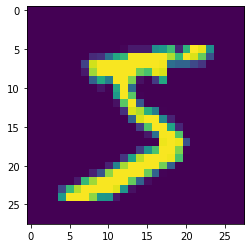

In [267]:
plt.imshow(m.reshape(28,28))

In [269]:
m = X_train[0]
x = m.reshape(-1, 1)
  

  
    
z  = W @ x + b1

h = relu(z)
t = U @ h + b2
y_hat = softmax(t)

In [270]:
np.argmax(y_hat)


0

In [272]:
W

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [257]:
type(W[0][0])

numpy.float64

In [265]:
type(x[0][0])

numpy.int64

# easy case

In [6]:
f = lambda x: (x-1)**2 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
x = np.linspace(0,2,10)
y = f(x)
y

array([1.        , 0.60493827, 0.30864198, 0.11111111, 0.01234568,
       0.01234568, 0.11111111, 0.30864198, 0.60493827, 1.        ])

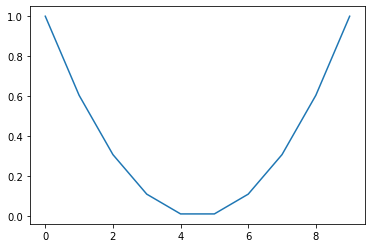

In [9]:
plt.plot(y)

In [10]:
#let's opimise f(x) = (x-1)**2 

#derivative f'(x) = 2*x - 2

#idea:
#for some x compute derivative (= 1D gradient) at this x 
#then move in the direction of negative gradient * learning rate
#go to line 6

grad = lambda x: 2*x - 2
#get any x in R
x = 0

for _ in range(100):
    #compute grad at x
    g = grad(x)
    #get new x by moving slightly 
    x = x - g*0.1
x

0.9999999997962964

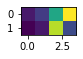

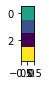

In [27]:
x = np.random.random([4,1])
W = np.random.random([2, 4])
plt.figure(figsize=(1,3))
plt.imshow(W)
plt.show()
plt.figure(figsize=(3,1))

plt.imshow(x)

In [26]:
#let's opimise f :: M(4,2) -> x(4,1) -> 2R
#f(W, x) = sum W @ x

#let's find the gradient

#idea:
#for some x compute derivative (= 1D gradient) at this x 
#then move in the direction of negative gradient * learning rate
#go to line 6

grad = lambda x: 2*x - 2
#get any x in R
x = 0

for _ in range(100):
    #compute grad at x
    g = grad(x)
    #get new x by moving slightly 
    x = x - g*0.1
x

In [22]:
f = lambda W, x: sum(W @ x) 

In [29]:
f(W,x)

array([1.71146745])

In [76]:
#let's opimise f(W, x) = (x-1)**2 

#derivative f'(x) = 2*x - 2

#idea:
#for some x compute derivative (= 1D gradient) at this x 
#then move in the direction of negative gradient * learning rate
#go to line 6

def grad(x):
    return (np.append(x, x, axis=1)).T * sum(W @ x)


In [77]:
x

array([[0.12500618],
       [0.58116501],
       [0.60776946],
       [0.32107175]])

In [78]:
grad(x)

array([[ -234.02623795, -1088.00906978, -1137.815733  ,  -601.0839875 ],
       [ -234.02623795, -1088.00906978, -1137.815733  ,  -601.0839875 ]])

In [79]:
W

array([[-574.94624415, -571.93606655, -572.28227641, -572.84840519],
       [-574.97470087, -571.84816693, -572.57334437, -572.79713787]])

In [80]:
x.T

array([[0.12500618, 0.58116501, 0.60776946, 0.32107175]])

In [81]:
np.append(x, x, axis=1)

array([[0.12500618, 0.12500618],
       [0.58116501, 0.58116501],
       [0.60776946, 0.60776946],
       [0.32107175, 0.32107175]])

In [97]:
#let's opimise f(W, x) = (x-1)**2 

#derivative f'(x) = 2*x - 2

#idea:
#for some x compute derivative (= 1D gradient) at this x 
#then move in the direction of negative gradient * learning rate
#go to line 6


for _ in range(10000):
    x = np.random.random([4,1])

    #compute grad at x
    g = grad(x)
    #get new W by moving slightly 
    W = W - g*0.0001
W

array([[ 0.01422836, -0.04394981,  0.14553398, -0.02563366],
       [-0.01422836,  0.04394981, -0.14553398,  0.02563366]])

In [96]:
sum(W @ x)

array([-2.24820162e-15])

In [94]:
W

array([[ 0.01422836, -0.04394981,  0.14553398, -0.02563366],
       [-0.01422836,  0.04394981, -0.14553398,  0.02563366]])

In [92]:
x = np.random.random([4,1])

In [101]:
x

array([[0.17125092],
       [0.63914855],
       [0.51703967],
       [0.89838419]])

In [102]:
sum(W@x)

array([1.94289029e-16])

# I'll try sign function 
# for numbers from [-2, 2]

In [89]:
@np.vectorize
def sign(x):
    if x >= 0:
        return 1
    else:
        return 0

In [4]:
# generating dataset

inputs  = np.random.uniform(-2,2, 1000)
outputs = sign(inputs)

In [47]:
sign(U)

array([[1, 1]])

In [7]:
outputs = sign(inputs)

In [48]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



#### 

In [90]:
#forward pass
#   o x
# o     o
#   o x

x0 = 1
W = np.random.random([2,1])
x1 = x0 * W 
U = np.random.random([1,2])
x2 = U @ x1

#loss is (predicted - wright)**2

In [169]:


def dx2_dU(x, W):
    return (x * W).T

def dLoss_dU(x, W, U):
    
    return 2 * (U @ (x * W)) * dx2_dU(x, W) - 2 * sign(x) * dx2_dU(x, W)

def dx2_dW(x, U):
    return (x * U).T

def dLoss_dW(x, W, U):
    return 2 * (U @ (x * W)) * dx2_dW(x, U) - 2 * sign(x) * dx2_dW(x, U)

In [176]:
x0 = 0.9
W  = np.random.random([100,1])
x1 = x0 * W
U  = np.random.random([1,100])
x2 = U @ x1
x2

for x in inputs:
    #compute gradients at x
    dU = dLoss_dU(x, W, U)
    dW = dLoss_dW(x, W, U)
    
    U = U - dU * 0.001
    W = W - dW * 0.001
    


In [95]:
x0 = 0.9
W  = np.random.random([2,1])
x1 = x0 * W
U  = np.random.random([1,2])
x2 = U @ x1
x2

array([[0.54662037]])

In [64]:
U

array([[0.34277626, 0.77004073]])

In [163]:
def pred(x):
    x1 = x * W
    x2 = U @ x1
    return x2[0][0]


In [115]:
p = [pred(x) for x in inputs[:12]]

-0.18846724308320986
0.10991563353262551
-1.37575145759405
0.13269306498889255
0.17253593956309632
-1.7445604045644472
0.021631475801849383
0.21389374883334591
0.3207393757509394
0.21743016668990167
0.25735846860934997
0.16918107924458048


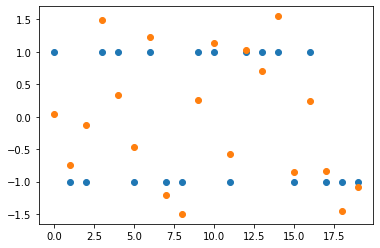

In [182]:
inputs  = np.random.uniform(-1,1, 100000)
p = [pred(x) for x in inputs[:100]]
outputs = sign(inputs)

plt.plot(outputs[:20], 'o')
plt.plot(p[:20], 'o')

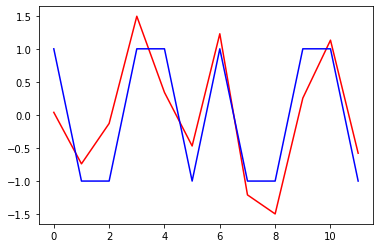

In [183]:
plt.plot(p[:12], 'r')
plt.plot(outputs[:12], 'b')

In [161]:
@np.vectorize
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1